<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluna: [Maria Luiza Cordeiro](https://www.linkedin.com/in/malu-analise-de-dados/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

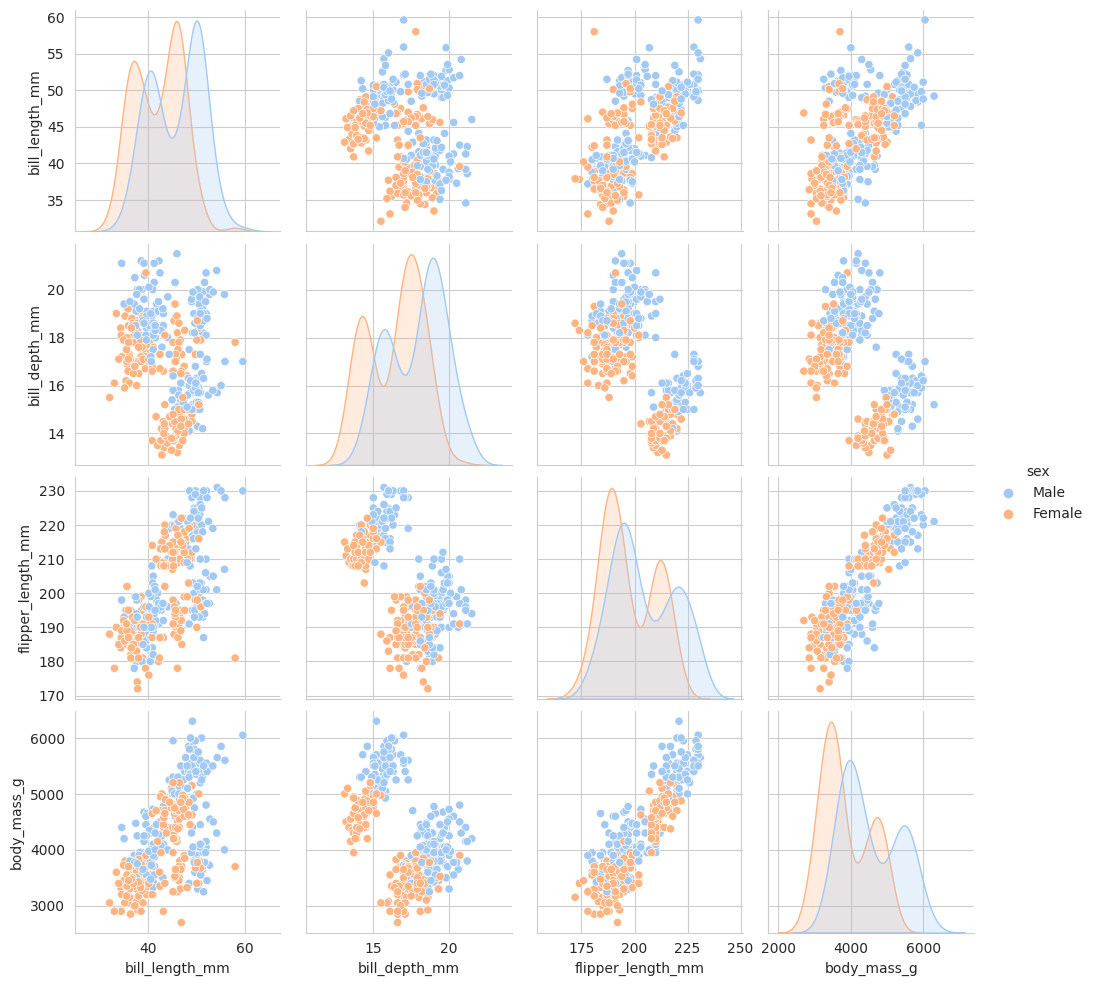

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:**

Tanto os machos quanto as fêmeas apresentam um comportamento semelhante: um subida, uma queda, uma subida menor e depois outra queda; mas, nos machos, esse padrão aparece quando, no gráfico, números maiores são atingidos.

 - Atributos por espécie:

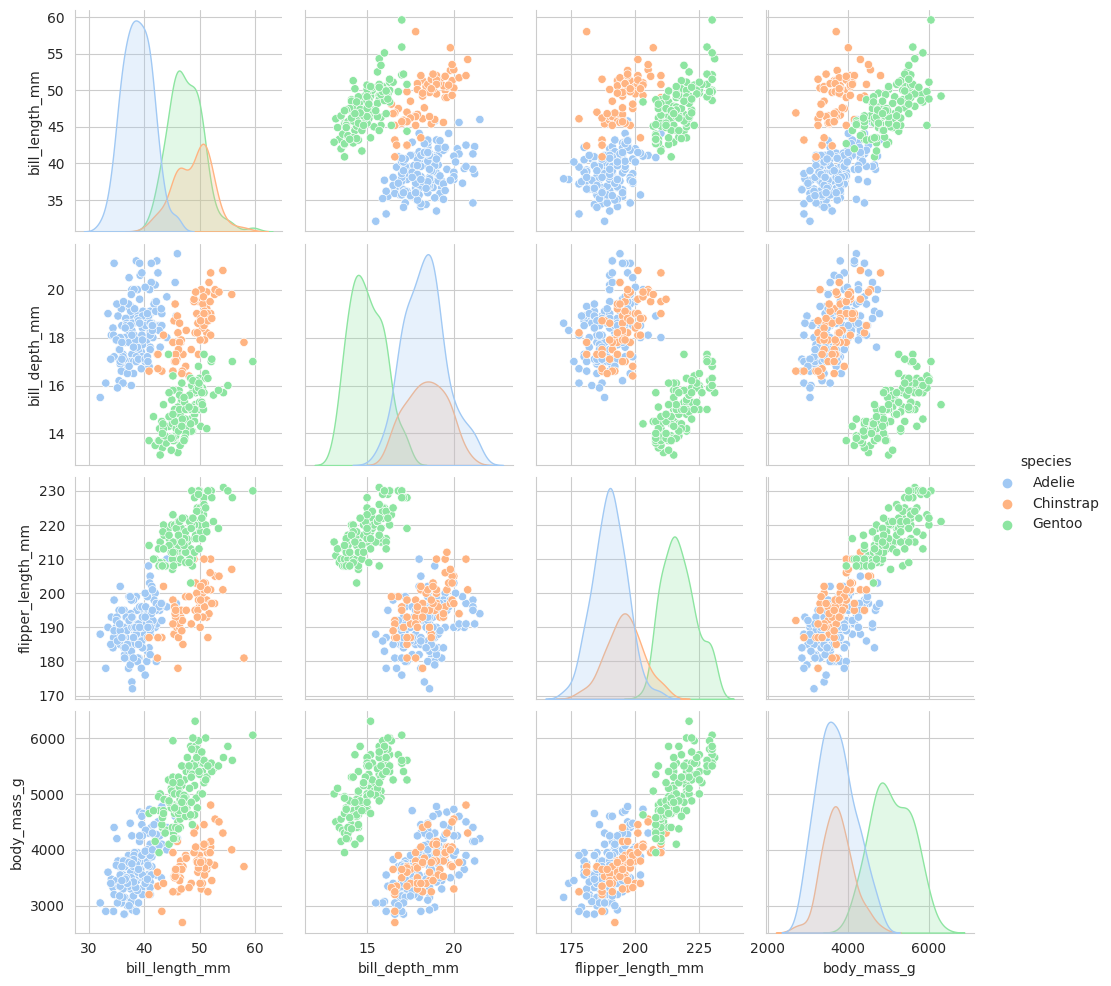

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:**

As espécies Adelie e Chinstrap apresentam comportamento semelhante na maioria dos gráficos, porém há uma maior expressividade nos indivíduos da espécie Adelie do que os da espécie Chistrap.

 - Atributos por ilha:

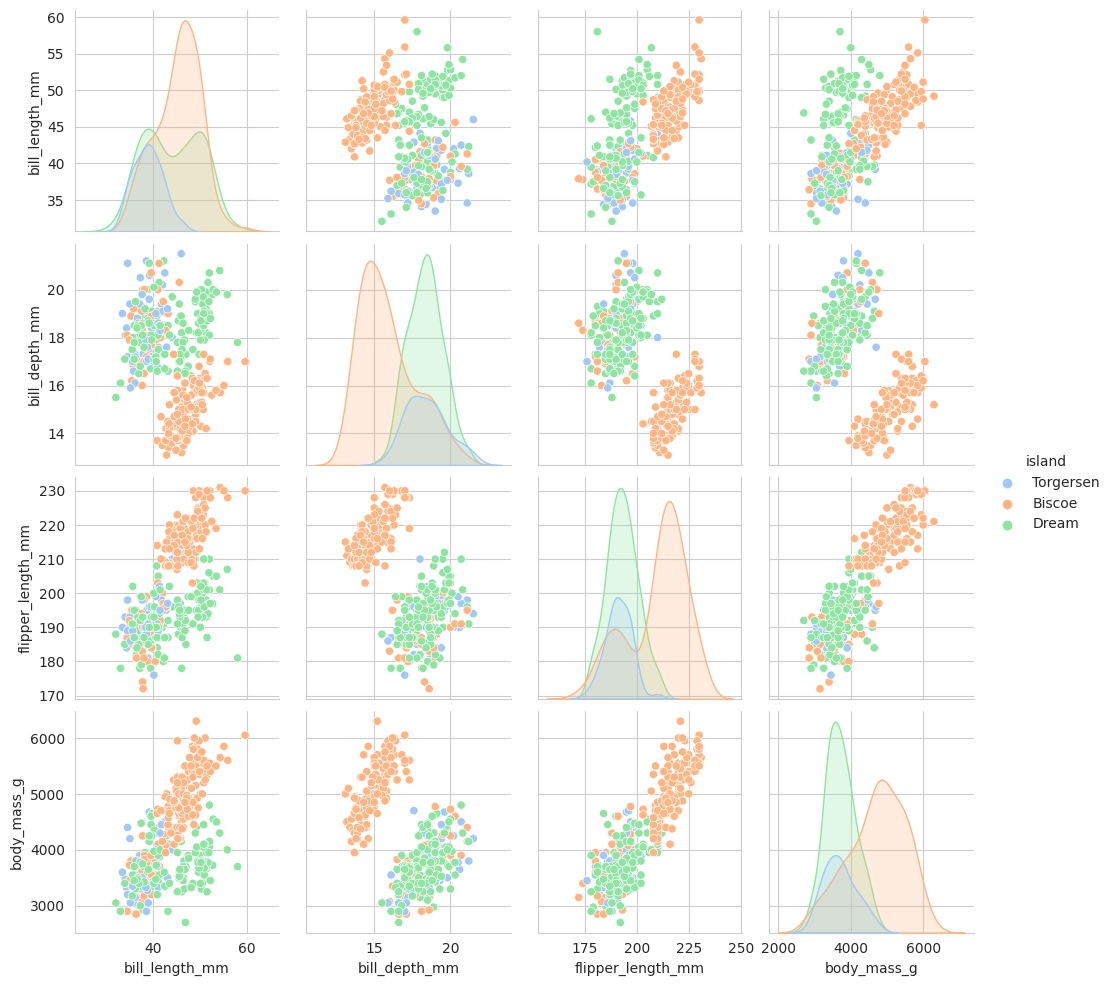

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:**

Os indivíduos das ilhas Dream e Torgersen apresentam comportamento semelhante na maioria dos gráficos, porém há uma maior expressividade nos indivíduos da ilha Dream do que os da espécie Torgersen.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

penguins_clean_df = penguim.dropna(subset=['sex'])
penguins_clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [8]:
print(penguins_clean_df.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

In [9]:
# resposta da questão 2.2

penguins_clean_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [10]:
# bill_length_mm

media_bill_length = penguins_clean_df['bill_length_mm'].mean()
print(media_bill_length)

desvio_padrao_bill_length = penguins_clean_df['bill_length_mm'].std()
print(desvio_padrao_bill_length)

penguins_clean_df['bill_length_mm_std'] = penguins_clean_df['bill_length_mm'].apply(lambda b_l_mm: (b_l_mm - media_bill_length) / desvio_padrao_bill_length)

43.99279279279279
5.468668342647559


<ipython-input-10-87b39ee5132e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['bill_length_mm_std'] = penguins_clean_df['bill_length_mm'].apply(lambda b_l_mm: (b_l_mm - media_bill_length) / desvio_padrao_bill_length)


In [11]:
# bill_depth_mm

media_bill_depth = penguins_clean_df['bill_depth_mm'].mean()
print(media_bill_depth)

desvio_padrao_bill_depth = penguins_clean_df['bill_depth_mm'].std()
print(desvio_padrao_bill_depth)

penguins_clean_df['bill_depth_mm_std'] = penguins_clean_df['bill_depth_mm'].apply(lambda b_d_mm: (b_d_mm - media_bill_depth) / desvio_padrao_bill_depth)

17.164864864864864
1.9692354633199007


<ipython-input-11-50ef34918978>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['bill_depth_mm_std'] = penguins_clean_df['bill_depth_mm'].apply(lambda b_d_mm: (b_d_mm - media_bill_depth) / desvio_padrao_bill_depth)


In [12]:
# flipper_length_mm

media_flipper_length = penguins_clean_df['flipper_length_mm'].mean()
print(media_flipper_length)

desvio_padrao_flipper_length = penguins_clean_df['flipper_length_mm'].std()
print(desvio_padrao_flipper_length)

penguins_clean_df['flipper_length_mm_std'] = penguins_clean_df['flipper_length_mm'].apply(lambda f_l_mm: (f_l_mm - media_flipper_length) / desvio_padrao_flipper_length)

200.96696696696696
14.015765288287879


<ipython-input-12-7e2a52e655f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['flipper_length_mm_std'] = penguins_clean_df['flipper_length_mm'].apply(lambda f_l_mm: (f_l_mm - media_flipper_length) / desvio_padrao_flipper_length)


In [13]:
# body_mass_g

media_body_mass = penguins_clean_df['body_mass_g'].mean()
print(media_body_mass)

desvio_padrao_body_mass = penguins_clean_df['body_mass_g'].std()
print(desvio_padrao_body_mass)

penguins_clean_df['body_mass_g_std'] = penguins_clean_df['body_mass_g'].apply(lambda b_m_g: (b_m_g - media_body_mass) / desvio_padrao_body_mass)

4207.057057057057
805.2158019428965


<ipython-input-13-d43bf0fd04c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['body_mass_g_std'] = penguins_clean_df['body_mass_g'].apply(lambda b_m_g: (b_m_g - media_body_mass) / desvio_padrao_body_mass)


In [14]:
penguins_clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,-0.567621
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,-0.505525
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,-1.188572
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,-0.940192
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,-0.691811


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

In [15]:
# resposta da questão 2.3

penguins_clean_df[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male


In [16]:
penguins_clean_df['species'].drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

In [17]:
penguins_clean_df['island'].drop_duplicates()

0     Torgersen
20       Biscoe
30        Dream
Name: island, dtype: object

In [18]:
penguins_clean_df['sex'].drop_duplicates()

0      Male
1    Female
Name: sex, dtype: object

In [19]:
# species

penguins_clean_df['species_adelle_nom'] = penguins_clean_df['species'].apply(lambda species: 1 if species == 'Adelie' else 0)
penguins_clean_df['species_chinstrap_nom'] = penguins_clean_df['species'].apply(lambda species: 1 if species == 'Chinstrap' else 0)
penguins_clean_df['species_gentoo_nom'] = penguins_clean_df['species'].apply(lambda species: 1 if species == 'Gentoo' else 0)

<ipython-input-19-9a3fc2e69a51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['species_adelle_nom'] = penguins_clean_df['species'].apply(lambda species: 1 if species == 'Adelie' else 0)
<ipython-input-19-9a3fc2e69a51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['species_chinstrap_nom'] = penguins_clean_df['species'].apply(lambda species: 1 if species == 'Chinstrap' else 0)
<ipython-input-19-9a3fc2e69a51>:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [20]:
# island

penguins_clean_df['island_torgersen_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
penguins_clean_df['island_biscoe_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
penguins_clean_df['island_dream_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Dream' else 0)

<ipython-input-20-b6d23bca3c7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['island_torgersen_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
<ipython-input-20-b6d23bca3c7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['island_biscoe_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
<ipython-input-20-b6d23bca3c7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [21]:
# sex

penguins_clean_df['sex_male_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
penguins_clean_df['sex_female_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

<ipython-input-21-068aa2581b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['sex_male_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
<ipython-input-21-068aa2581b58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['sex_female_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)


In [22]:
penguins_clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,-0.567621,1,0,0,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,-0.505525,1,0,0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,-1.188572,1,0,0,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,-0.940192,1,0,0,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,-0.691811,1,0,0,1,0,0,1,0


### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [23]:
# resposta da questão 2.4

penguins = penguins_clean_df.drop(columns=['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])
penguins.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,-0.894695,0.779559,-1.424608,-0.567621,1,0,0,1,0,0,1,0
1,-0.821552,0.119404,-1.067867,-0.505525,1,0,0,1,0,0,0,1
2,-0.675264,0.424091,-0.425733,-1.188572,1,0,0,1,0,0,0,1
4,-1.333559,1.084246,-0.568429,-0.940192,1,0,0,1,0,0,0,1
5,-0.858123,1.744400,-0.782474,-0.691811,1,0,0,1,0,0,1,0


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [24]:
# resposta da questão 2.5

from sklearn.model_selection import train_test_split

In [25]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguins.drop(['body_mass_g_std'], axis=1),
    penguins['body_mass_g_std'],
    test_size=0.33,
    random_state=123
)

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (223, 11)
predictors_test.shape = (110, 11)
target_train.shape = (223,)
target_test.shape = (110,)


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [26]:
# resposta da questão 3.1

from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model = model.fit(predictors_train, target_train)

In [29]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'species_adelle_nom', 'species_chinstrap_nom',
        'species_gentoo_nom', 'island_torgersen_nom', 'island_biscoe_nom',
        'island_dream_nom', 'sex_male_nom', 'sex_female_nom'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 0.16506132,  0.19387414,  0.26551055, -0.28039216, -0.66857209,
         0.94896425, -0.07059141,  0.027356  ,  0.04323542,  0.22981989,
        -0.22981989]),
 'rank_': 8,
 'singular_': array([2.39939919e+01, 1.54190455e+01, 1.09565999e+01, 6.05161850e+00,
        5.75044839e+00, 5.23634488e+00, 3.24444459e+00, 2.08280233e+00,
        1.88880719e-15, 1.53620892e-15, 1.17756091e-15]),
 'intercept_': -0.11423490736744463}

In [30]:
a = model.coef_
print(a)

[ 0.16506132  0.19387414  0.26551055 -0.28039216 -0.66857209  0.94896425
 -0.07059141  0.027356    0.04323542  0.22981989 -0.22981989]


In [31]:
b = model.intercept_
print(b)

-0.11423490736744463


### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

In [32]:
# resposta da questão 3.2

from sklearn.metrics import mean_squared_error

In [33]:
target_predicted = model.predict(predictors_test)

In [34]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.36743524905201286


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

In [35]:
# resposta da questão 4.1

penguins.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,-0.894695,0.779559,-1.424608,-0.567621,1,0,0,1,0,0,1,0
1,-0.821552,0.119404,-1.067867,-0.505525,1,0,0,1,0,0,0,1
2,-0.675264,0.424091,-0.425733,-1.188572,1,0,0,1,0,0,0,1
4,-1.333559,1.084246,-0.568429,-0.940192,1,0,0,1,0,0,0,1
5,-0.858123,1.744400,-0.782474,-0.691811,1,0,0,1,0,0,1,0


In [36]:
bill_length_mm_padronizada = (38.2 - media_bill_length) / desvio_padrao_bill_length
print(bill_length_mm_padronizada)

-1.0592693558718007


In [37]:
bill_depth_mm_padronizada = (18.1 - media_bill_depth) / desvio_padrao_bill_depth
print(bill_depth_mm_padronizada)

0.4748721788498614


In [38]:
flipper_length_mm_padronizada = (185.0 - media_flipper_length) / desvio_padrao_flipper_length
print(flipper_length_mm_padronizada)

-1.1392147798243728


In [39]:
novo_penguim = np.array([bill_length_mm_padronizada, bill_depth_mm_padronizada, flipper_length_mm_padronizada, 1, 0, 0, 0, 1, 0, 1, 0])

print(novo_penguim)

[-1.05926936  0.47487218 -1.13921478  1.          0.          0.
  0.          1.          0.          1.          0.        ]


In [40]:
peso_penguim_padronizado = model.predict(novo_penguim.reshape(1, -1))
print(peso_penguim_padronizado)

[-0.52270369]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
peso_penguim = -0.52270369 * desvio_padrao_body_mass + media_body_mass
print(peso_penguim)

3786.167786135196


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | 3786.16 | Male |

---